In [1]:
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

### Функции

In [2]:
def ackley(x, y):
    return -20*np.exp(-0.2*np.sqrt(0.5*(x**2+y**2))) \
            - np.exp(0.5*(np.cos(2*x*math.pi)+np.cos(2*y*math.pi))) + math.e + 20


def himel(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 -7)**2


def holder(x, y):
    return -abs(np.sin(x)*np.cos(y)*np.exp(abs(1-(np.sqrt(x**2+y**2))/(math.pi))))


def crossInTray(x, y):
    return -0.0001*(abs(np.sin(x)*np.sin(y)*np.exp(abs(100-(x**2+y**2)/(math.pi))))+1)**0.1

### Алгоритм пчелиной колонии

In [3]:
class BCO:
    
    def __init__(self, func, area = (-5, 5), itr = 200, radius = 1, bestP = 6, normP = 4, bfp = 10):
        
        self.func = func                   # Исследуемая функция
        self.itr = itr                     # Количество итераций
        self.area = area                   # Область определения
        self.rad = radius                  # Радиус полета вокруг точки
        self.bestP = bestP                 # Количество глобально лучших точек
        self.normP = normP                 # Количество случайных точек
        self.bfp = bfp                     # Количество пчел, вылетающих на разведку одной точки
        self.beesQ = bestP*self.bfp + normP*self.bfp   # Количество пчел
        
        self.bees = np.random.uniform(area[0], area[1], (self.beesQ, 2))   # Координаты пчел
        self.beesValues = np.array([self.func(*bee) for bee in self.bees]) # Значения функции в точках нахождения пчел
        
        self.bestPoints = np.zeros((bestP, 2))   # Глобально лучшие найденные точки
        self.normalPoints = np.zeros((normP, 2)) # Случайно найденные точки
        
        # Инициализация глобально лучших точек
        maxV = np.max(self.beesValues)
        for i in range(self.bestP):
            minI = np.argmin(self.beesValues)
            self.bestPoints[i] = self.bees[minI].copy()
            self.beesValues[minI] = maxV
        
        # Инициализация случайных точек
        for i in range(self.normP):
            pI = np.random.randint(self.beesQ)
            while self.bees[pI] in self.bestPoints:
                pI = np.random.randint(self.beesQ)
            self.normalPoints[i] = self.bees[pI].copy()
        
        self.beesHist = [self.bees.copy()]       # Координаты пчел на каждой итерации
        self.bestHist = [self.bestPoints.copy()] # Лучшие найденные точки на каждой итерации

    
    def execute(self):
        
        for i in range(itr):
            for pointI, point in enumerate(np.concatenate((self.bestPoints, self.normalPoints))):
                
                # Определение области полета пчел вокруг точки
                x, y = point
                
                xMin = x - self.rad
                if xMin < self.area[0]:
                    xMin = self.area[0]
                xMax = x + self.rad
                if xMax > self.area[1]:
                    xMax = self.area[1]
                    
                yMin = y - self.rad
                if yMin < self.area[0]:
                    yMin = self.area[0]
                yMax = y + self.rad
                if yMax > self.area[1]:
                    yMax = self.area[1]
                
                # Определение новых координат пчел
                xs = np.random.uniform(xMin, xMax, self.bfp)
                ys = np.random.uniform(yMin, yMax, self.bfp)
                self.bees[pointI*self.bfp:(pointI+1)*self.bfp] = np.column_stack((xs, ys))
            
            # Вычисление значения функции в новых точках
            self.beesValues = np.array([self.func(*bee) for bee in self.bees])
            
            # Обновление глобально лучших точек
            maxV = np.max(self.beesValues)
            inserted = False
            for i in range(self.bestP):
                minI = np.argmin(self.beesValues)
                for j, p in enumerate(self.bestPoints):
                    if self.beesValues[minI] < func(*p) and not inserted:
                        self.bestPoints = np.insert(self.bestPoints, j, self.bees[minI].copy(), axis=0)
                        self.bestPoints = np.delete(self.bestPoints, -1, axis=0)
                        inserted = True
                    if inserted:
                        break
                if not inserted:
                    break
                inserted = False
                self.beesValues[minI] = maxV
            
            # Обновление случайных точек
            for i in range(self.normP):
                pI = np.random.randint(self.beesQ)
                while self.bees[pI] in self.bestPoints:
                    pI = np.random.randint(self.beesQ)
                self.normalPoints[i] = self.bees[pI].copy()
            
            # Уменьшение радиуса полета
            self.rad = self.rad*(self.itr-i)/self.itr
            
            # Добавление текущих координат пчел и лучших точек
            self.beesHist.append(self.bees.copy())
            self.bestHist.append(self.bestPoints.copy())
            

### Функция Экли

Минимум функции: 0.0
Найденный минимум: 0.002126524


<IPython.core.display.Javascript object>


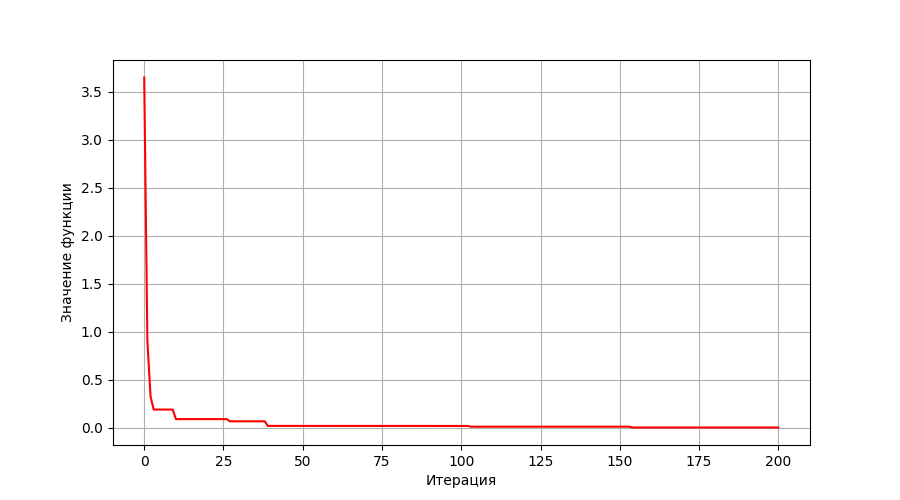

In [4]:
func = ackley
area = (-5, 5)
itr = 200
radius = 1
bestPoints = 6
normalPoints = 4
bfp = 10

bco = BCO(func, area, itr, radius, bestPoints, normalPoints, bfp)
bco.execute()
    
bees = [list(map(lambda x: list(x), bees)) for bees in bco.beesHist]
bests = [func(*b[0]) for b in bco.bestHist]

print(f'Минимум функции: 0.0\nНайденный минимум: {round(bests[-1], 9)}')

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()

ax.plot(bests, color='red', linewidth=1.5)
ax.set_xlabel('Итерация')
ax.set_ylabel('Значение функции')
ax.grid()


<IPython.core.display.Javascript object>


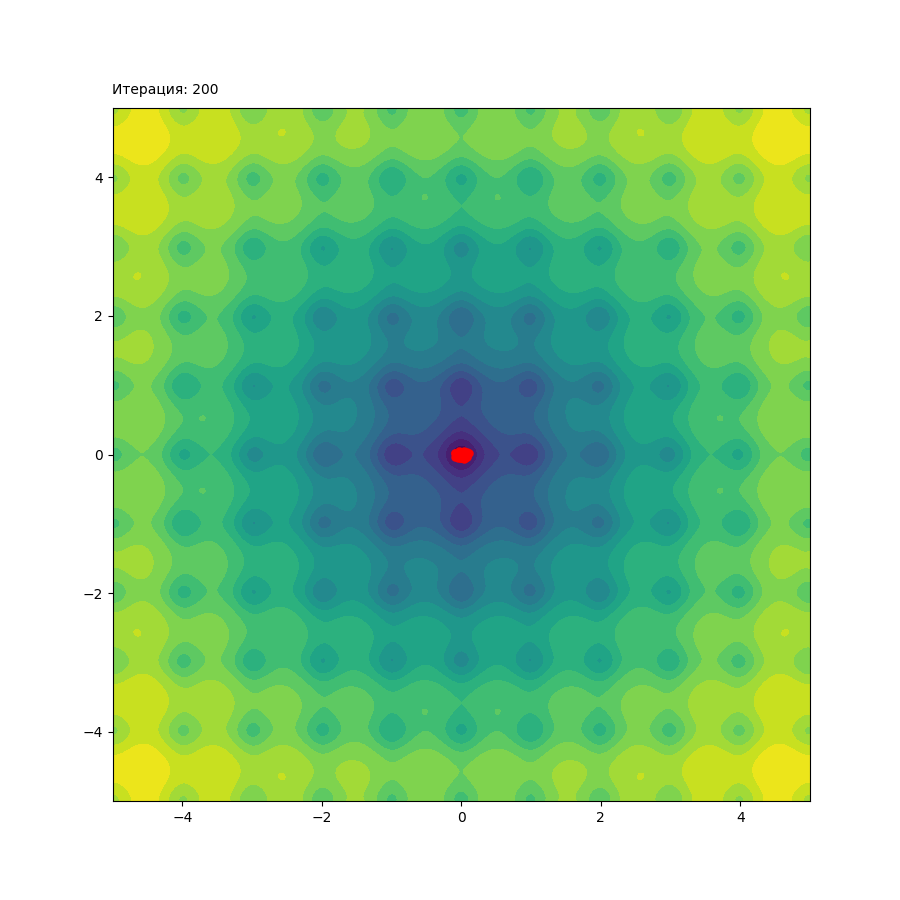

In [5]:
delta = 0.01
x = np.arange(-5, 5, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)


figA = plt.figure(figsize=(9, 9))
axA = figA.add_subplot()

plt.xlim(-5, 5)
plt.ylim(-5, 5)

axA.contourf(X, Y, Z, levels = 20)

scat = axA.scatter([], [], c='red', linewidths=0.1)
temp = axA.text(-5, 5.2, '')
    
def animate(i):
    temp.set_text('Итерация: ' + str(i))
    scat.set_offsets(bees[i])
    
anim1 = FuncAnimation(figA, animate, frames=len(bees), interval=50, repeat=False)

### Функция Химмельблау

Минимум функции: 0.0
Найденный минимум: 0.0


<IPython.core.display.Javascript object>


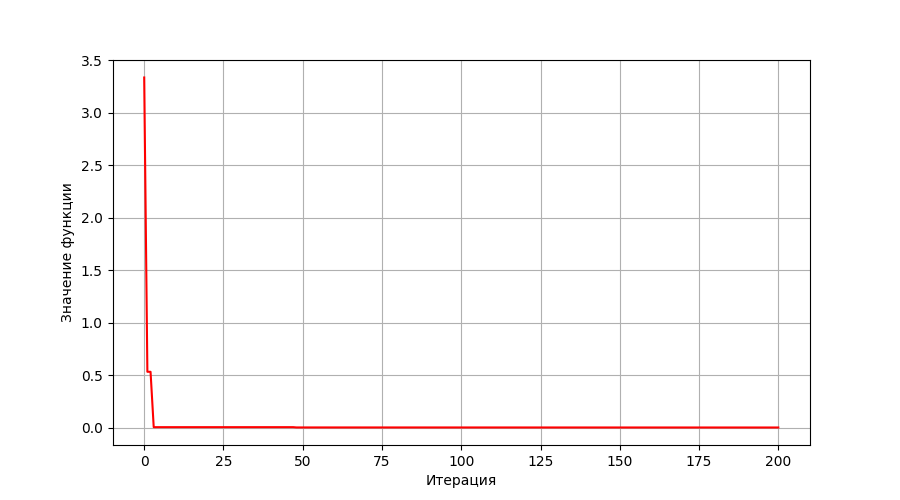

In [6]:
func = himel
area = (-5, 5)
itr = 200
radius = 1
bestPoints = 6
normalPoints = 4
bfp = 10

bco = BCO(func, area, itr, radius, bestPoints, normalPoints, bfp)
bco.execute()
    
bees = [list(map(lambda x: list(x), bees)) for bees in bco.beesHist]
bestsPoints = bco.bestHist
bests = [func(*b[0]) for b in bestsPoints]

print(f'Минимум функции: 0.0\nНайденный минимум: {round(bests[-1], 4)}')

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()

ax.plot(bests, color='red', linewidth=1.5)
ax.set_xlabel('Итерация')
ax.set_ylabel('Значение функции')
ax.grid()

In [7]:
print(f'Минимум функции: 0.0')
print(f'\nТочки минимумов:')
print('f(3,2) = 0')
print('f(-2,805118, 3,131312) = 0')
print('f(-3,779310, -3,283186) = 0')
print('f(3,584428, -1,848126) = 0')
print(f'\nНачальные координаты лучших точек:')
print(bestsPoints[0])
print('\n\n')

for i in range(itr):
    print(f'Итерация: {i} Значение функции: {round(bests[i], 3)}')

print(f'\n\nКонечные координаты лучших точек:\n')
print(bestsPoints[-1])
print(f'\n\nНайденный минимум: {round(bests[-1], 4)}')

Минимум функции: 0.0

Точки минимумов:
f(3,2) = 0
f(-2,805118, 3,131312) = 0
f(-3,779310, -3,283186) = 0
f(3,584428, -1,848126) = 0

Начальные координаты лучших точек:
[[ 3.21601388  1.46509692]
 [ 2.7022677   2.4383506 ]
 [-2.95503888  3.49894107]
 [ 3.19119282 -1.67832841]
 [-2.85045065  3.54945751]
 [ 3.72422345 -1.02165084]]



Итерация: 0 Значение функции: 3.334
Итерация: 1 Значение функции: 0.531
Итерация: 2 Значение функции: 0.531
Итерация: 3 Значение функции: 0.003
Итерация: 4 Значение функции: 0.003
Итерация: 5 Значение функции: 0.003
Итерация: 6 Значение функции: 0.003
Итерация: 7 Значение функции: 0.003
Итерация: 8 Значение функции: 0.003
Итерация: 9 Значение функции: 0.003
Итерация: 10 Значение функции: 0.003
Итерация: 11 Значение функции: 0.003
Итерация: 12 Значение функции: 0.003
Итерация: 13 Значение функции: 0.003
Итерация: 14 Значение функции: 0.003
Итерация: 15 Значение функции: 0.003
Итерация: 16 Значение функции: 0.003
Итерация: 17 Значение функции: 0.003
Итерация: 

<IPython.core.display.Javascript object>


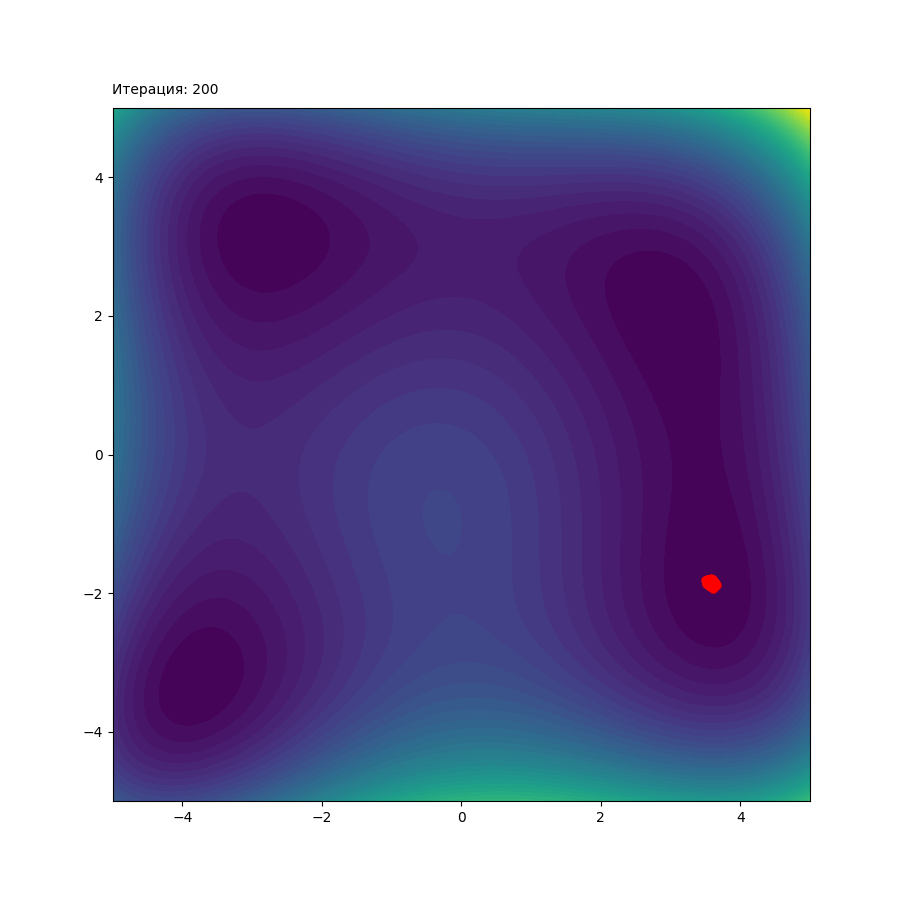

In [8]:
delta = 0.01
x = np.arange(-5, 5, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)
Z = himel(X, Y)


figA = plt.figure(figsize=(9, 9))
axA = figA.add_subplot()

plt.xlim(-5, 5)
plt.ylim(-5, 5)

axA.contourf(X, Y, Z, levels = 50)

scat = axA.scatter([], [], c='red', linewidths=0.1)
temp = axA.text(-5, 5.2, '')

def animate(i):
    temp.set_text('Итерация: ' + str(i))
    scat.set_offsets(bees[i])
    
anim = FuncAnimation(figA, animate, frames=len(bees), interval=50, repeat=False)

### Табличная функция Хольдера

Минимум функции: -19.2085
Найденный минимум: -19.208501088


<IPython.core.display.Javascript object>


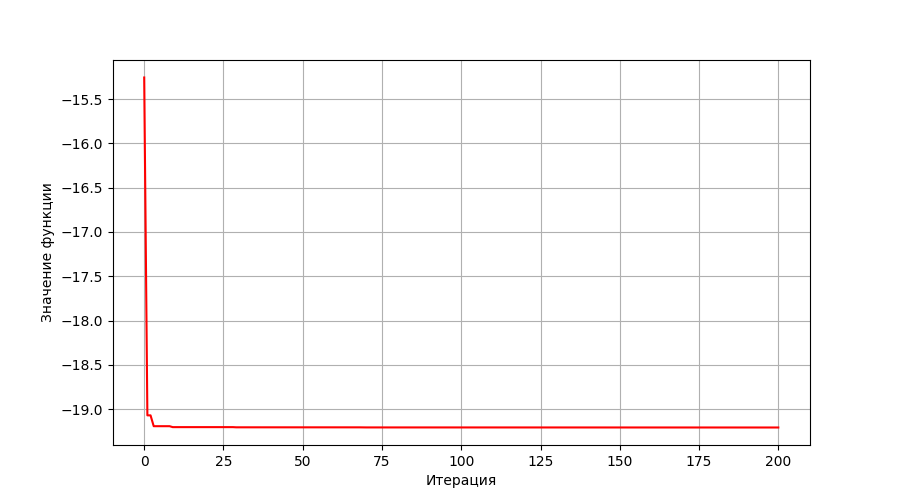

In [9]:
func = holder
area = (-10, 10)
itr = 200
radius = 1
bestPoints = 6
normalPoints = 4
bfp = 10

bco = BCO(func, area, itr, radius, bestPoints, normalPoints, bfp)
bco.execute()
    
bees = [list(map(lambda x: list(x), bees)) for bees in bco.beesHist]
bests = [func(*b[0]) for b in bco.bestHist]

print(f'Минимум функции: -19.2085\nНайденный минимум: {round(bests[-1], 9)}')

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()

ax.plot(bests, color='red', linewidth=1.5)
ax.set_xlabel('Итерация')
ax.set_ylabel('Значение функции')
ax.grid()


<IPython.core.display.Javascript object>


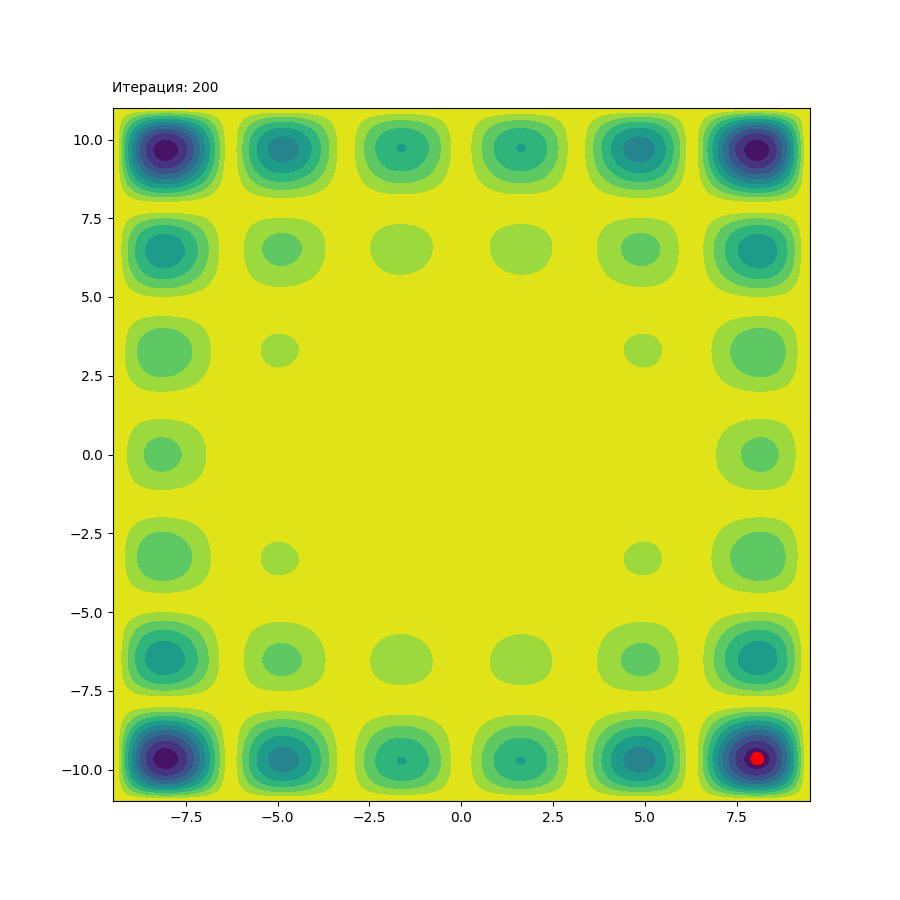

In [10]:
delta = 0.01
x = np.arange(-9.5, 9.5, delta)
y = np.arange(-11, 11, delta)
X, Y = np.meshgrid(x, y)
Z = holder(X, Y)


figA = plt.figure(figsize=(9, 9))
axA = figA.add_subplot()

plt.xlim(-9.5, 9.5)
plt.ylim(-11, 11)

axA.contourf(X, Y, Z, levels = 10)

scat = axA.scatter([], [], c='red', linewidths=0.1)
temp = axA.text(-9.5, 11.5, '')

def animate(i):
    temp.set_text('Итерация: ' + str(i))
    scat.set_offsets(bees[i])
    
anim = FuncAnimation(figA, animate, frames=len(bees), interval=50, repeat=False)

### Функция "крест на подносе"

Минимум функции: -2.06261
Найденный минимум: -1.996665082


<IPython.core.display.Javascript object>


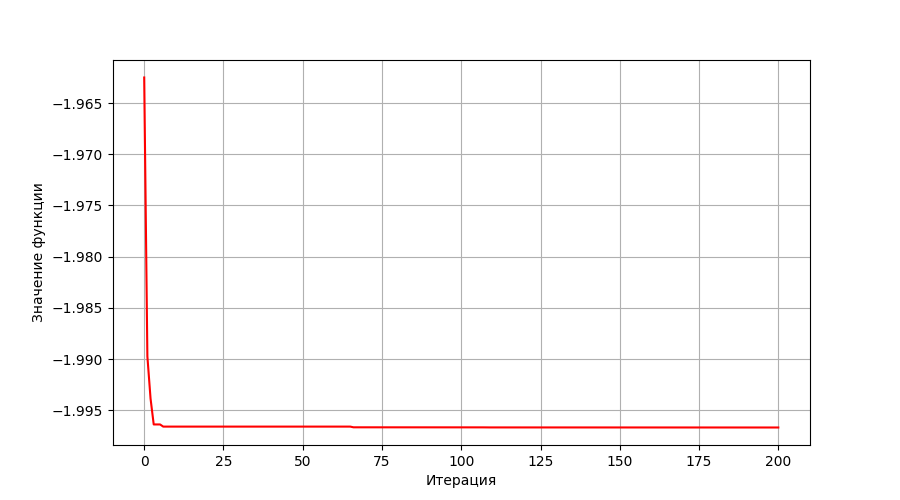

In [11]:
func = crossInTray
area = (-9, 9)
itr = 200
radius = 1
bestPoints = 6
normalPoints = 4
bfp = 10

bco = BCO(func, area, itr, radius, bestPoints, normalPoints, bfp)
bco.execute()

bees = [list(map(lambda x: list(x), bees)) for bees in bco.beesHist]
bests = [func(*b[0]) for b in bco.bestHist]

print(f'Минимум функции: -2.06261\nНайденный минимум: {round(bests[-1], 9)}')

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()

ax.plot(bests, color='red', linewidth=1.5)
ax.set_xlabel('Итерация')
ax.set_ylabel('Значение функции')
ax.grid()

<IPython.core.display.Javascript object>


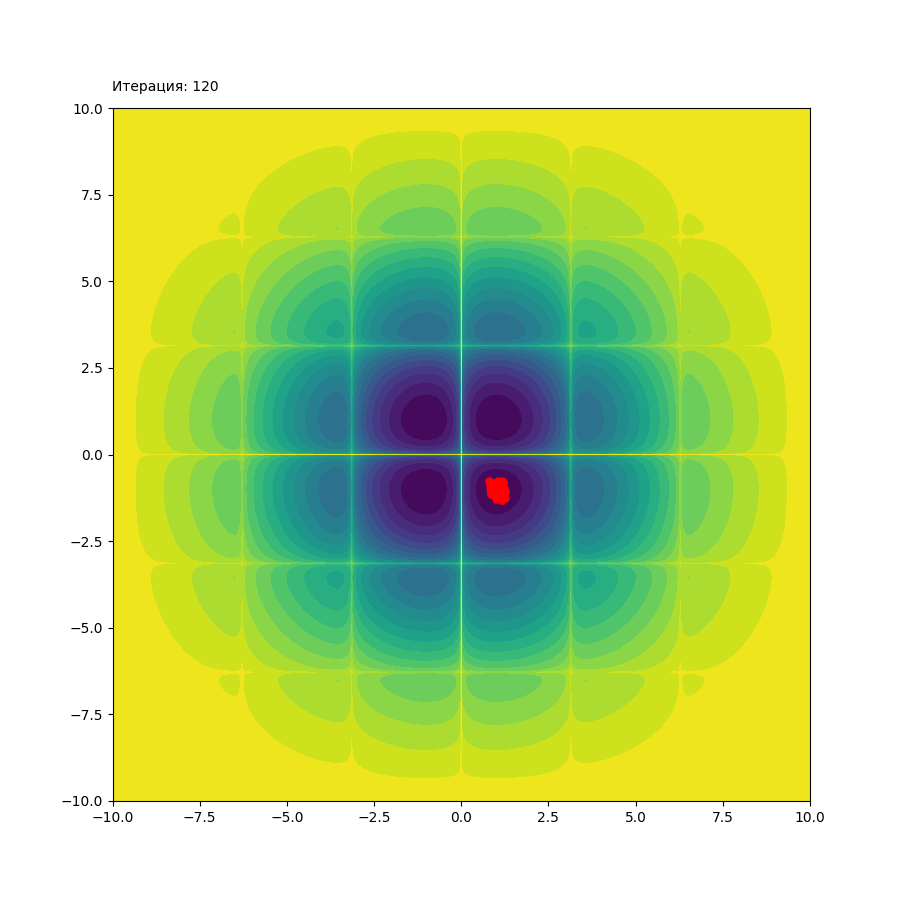

In [12]:
delta = 0.01
x = np.arange(-10, 10, delta)
y = np.arange(-10, 10, delta)
X, Y = np.meshgrid(x, y)
Z = crossInTray(X, Y)

figA = plt.figure(figsize=(9, 9))
axA = figA.add_subplot()

plt.xlim(-10, 10)
plt.ylim(-10, 10)

axA.contourf(X, Y, Z, levels = 20)

scat = axA.scatter([], [], c='red', linewidths=0.1)
temp = axA.text(-10, 10.5, '')

def animate(i):
    temp.set_text('Итерация: ' + str(i))
    scat.set_offsets(bees[i])
    
anim = FuncAnimation(figA, animate, frames=len(bees), interval=50, repeat=False)

In [ ]:
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Исследуемая функция
def himel(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 -7)**2


# Пчелиный алгоритм
class BCO:
    
    def __init__(self, func, area = (-5, 5), itr = 200, radius = 1, bestP = 6, normP = 4):
        
        self.func = func                   # Исследуемая функция
        self.itr = itr                     # Количество итераций
        self.area = area                   # Область определения
        self.rad = radius                  # Радиус полета вокруг точки
        self.bestP = bestP                 # Количество глобально лучших точек
        self.normP = normP                 # Количество случайных точек
        self.beesQ = bestP*10 + normP*10   # Количество пчел
        
        self.bees = np.random.uniform(area[0], area[1], (self.beesQ, 2))   # Координаты пчел
        self.beesValues = np.array([self.func(*bee) for bee in self.bees]) # Значения функции в точках нахождения пчел
        
        self.bestPoints = np.zeros((bestP, 2))   # Глобально лучшие найденные точки
        self.normalPoints = np.zeros((normP, 2)) # Случайно найденные точки
        
        # Инициализация глобально лучших точек
        maxV = np.max(self.beesValues)
        for i in range(self.bestP):
            minI = np.argmin(self.beesValues)
            self.bestPoints[i] = self.bees[minI].copy()
            self.beesValues[minI] = maxV
        
        # Инициализация случайных точек
        for i in range(self.normP):
            pI = np.random.randint(self.beesQ)
            while self.bees[pI] in self.bestPoints:
                pI = np.random.randint(self.beesQ)
            self.normalPoints[i] = self.bees[pI].copy()
        
        self.beesHist = [self.bees.copy()]       # Координаты пчел на каждой итерации
        self.bestHist = [self.bestPoints.copy()] # Лучшие найденные точки на каждой итерации
            
    
    def execute(self):
        
        for i in range(itr):
            for pointI, point in enumerate(np.concatenate((self.bestPoints, self.normalPoints))):
                
                # Определение области полета пчел вокруг точки
                x, y = point
                
                xMin = x - self.rad
                if xMin < self.area[0]:
                    xMIn = self.area[0]
                xMax = x + self.rad
                if xMax > self.area[1]:
                    xMax = self.area[1]
                    
                yMin = y - self.rad
                if yMin < self.area[0]:
                    yMin = self.area[0]
                yMax = y + self.rad
                if yMax > self.area[1]:
                    yMax = self.area[1]
                
                # Определение новых координат пчел
                xs = np.random.uniform(xMin, xMax, 10)
                ys = np.random.uniform(yMin, yMax, 10)
                self.bees[pointI*10:(pointI+1)*10] = np.column_stack((xs, ys))
            
            # Вычисление значения функции в новых точках
            self.beesValues = np.array([self.func(*bee) for bee in self.bees])
            
            # Обновление глобально лучших точек
            maxV = np.max(self.beesValues)
            inserted = False
            for i in range(self.bestP):
                minI = np.argmin(self.beesValues)
                for j, p in enumerate(self.bestPoints):
                    if self.beesValues[minI] < func(*p) and not inserted:
                        self.bestPoints = np.insert(self.bestPoints, j, self.bees[minI].copy(), axis=0)
                        self.bestPoints = np.delete(self.bestPoints, -1, axis=0)
                        inserted = True
                    if inserted:
                        break
                if not inserted:
                    break
                inserted = False
                self.beesValues[minI] = maxV
            
            # Обновление случайных точек
            for i in range(self.normP):
                pI = np.random.randint(self.beesQ)
                while self.bees[pI] in self.bestPoints:
                    pI = np.random.randint(self.beesQ)
                self.normalPoints[i] = self.bees[pI].copy()
            
            # Уменьшение радиуса полета
            self.rad = self.rad*(self.itr-i)/self.itr
            
            # Добавление текущих координат пчел и лучших точек
            self.beesHist.append(self.bees.copy())
            self.bestHist.append(self.bestPoints.copy())


# Инициализация параметров
func = himel
area = (-5, 5)
itr = 200
radius = 1
bestPoints = 6
normalPoints = 4

# Запуск алгоритма
bco = BCO(func, area, itr, radius, bestPoints, normalPoints)
bco.execute()

# Выходные данные
bees = [list(map(lambda x: list(x), bees)) for bees in bco.beesHist]
bests = [func(*b[0]) for b in bco.bestHist]

# Вывод результатов
print(f'Минимум функции: 0.0')
print(f'\nТочки минимумов:')
print('f(3,2) = 0')
print('f(-2,805118, 3,131312) = 0')
print('f(-3,779310, -3,283186) = 0')
print('f(3,584428, -1,848126) = 0')
print(f'\nНачальные координыты лучших точек:')
print(bestsPoints[0])
print('\n\n')

for i in range(itr):
    print(f'Итерация: {i} Значение функции: {round(bests[i], 3)}')

print(f'\n\nКонечные координыты лучших точек:\n')
print(bestsPoints[-1])
print(f'\n\nНайденный минимум: {round(bests[-1], 4)}')

# График
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()

ax.plot(bests, color='red', linewidth=1.5)
ax.set_xlabel('Итерация')
ax.set_ylabel('Значение функции')
ax.grid()

delta = 0.01
x = np.arange(-5, 5, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)
Z = himel(X, Y)

# Анимация
figA = plt.figure(figsize=(9, 9))
axA = figA.add_subplot()

plt.xlim(-5, 5)
plt.ylim(-5, 5)

axA.contourf(X, Y, Z, levels = 50)

scat = axA.scatter([], [], c='red', linewidths=0.1)
temp = axA.text(-5, 5.2, '')

def animate(i):
    temp.set_text('Итерация: ' + str(i))
    scat.set_offsets(bees[i])
    
anim = FuncAnimation(figA, animate, frames=len(bees), interval=50, repeat=False)